# Consumer Behavior Analytics - Data Cleaning

**Libraries and imports**

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Utils
# import lux
import itertools

# DataViz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer

# Notebook setup
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Schedule

**In order to perform the data cleaning of this dataset, we will proceed with the following steps:**

1. Check primary key integrity
2. Check for duplicates
3. Remove unimportant variables
4. Check for missing values
5. Check and handle outliers:
    - in numerical variables;
    - in categorical variables (with absurd values);
6. Save dataset into a new csv file, cleaned

### 0. Loading dataset and fast-reviewing it

In [2]:
customers = pd.read_csv('../data/ml_project1_data.csv', date_parser = 'Dt_Customer')

In [3]:
# Checking dataset shape
print('Num. of customers sampled: ', customers.shape[0], '\nNum. of features observed:   ', customers.shape[1])

# Viewing dataset and taking a look at its "face"
customers.head()

Num. of customers sampled:  2240 
Num. of features observed:    29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
customers.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [5]:
# Making a (quick) sense of variables behaviors
customers.describe(include = 'all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


## 1. Primary key integrity

In [6]:
# Checking for unique customers' IDs
customers['ID'].duplicated().sum()

0

There are no duplicated primay keys in the dataset. All `ID` entries are unique, and therefore its integrity holds.

We should move fowards, but we can observe that there is a `Dt_Customer` column and according to the data dictonary provided, it represents the date when the customers joined the database, that is when the customer became a _client_.

A good idea would be also checking the integrity of the `ID` column based on the entry date of the customer in the database. If they both match, the asceding order of `ID` equals the ascending order of `Dt_Customer`.

How can we achieve that?

- Sort the dataset by `ID` and keep a list of the dataset indexes with this sorting;
- Sort the dataset by `Dt_Customer` and keep a list of the dataset indexes when sorted this way;
- Compare if Python's positional indexes of the list are the same for the two Dataset indexes lists gerenated by sorting each of the columns.

In [7]:
# Checking if index sorted by ID is equal to index sorted by 'Dt_Customer'
customers.sort_values(by = 'ID').index.all == \
    customers.sort_values(by = 'Dt_Customer').index.all

False

The orders of the dataset indexes when sorted by the two columns individually are not the same (`FALSE`). Either new customers are being assigned random numbers when subscribed to the database or, worst, new customers are being reasigned old `ID` from customers who might have left.

While the latter is much more problematic than first — we wouldn't be able to perform a _correct_ temporal analysis —, the first is also a fault because it do disregards the oportunity of the `ID` itself being informative (a client numbered 5XXX would be obviously more recent than a client 2XXX).

In this way, we recomend a contacting the Data Engineering department to further investigate.

This configuration of the dataset won't impact this analysis though, and we should carry on checking for duplicates in the whole dataset.

## 2. Checking for duplicates

In [8]:
# Checking duplicated entries for all features
customers.duplicated().sum()

0

There are no full duplicated entries. We can move forward.

## 3. Removing uninformative columns

In [9]:
# Checking variables with a single unique value
customers.nunique()[customers.nunique() == 1]

Z_CostContact    1
Z_Revenue        1
dtype: int64

As we can see, both `Z_CostContact` and `Z_Revenue` variables have only one unique value (3 and 11, respectively). Thus, they do not apport value for future predictions.

It is important to notice as well, that despite their semi-explicative names, cost and revenue, we do not have these variables listed in our Data Dictionary. They may be important for a future revenue analysis, but right now, we cannot be assertive about their meanings.

Let's drop these variables, then:

In [10]:
customers.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)
customers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


## 4. Check for missing values

In [11]:
# Check missing values in each of the features
customers.isna().sum()[customers.isna().sum() > 0]

Income    24
dtype: int64

There are 24 entries with `Income` missing. Let's check how much (in %) this amount represents in the total dataset:

In [12]:
# Missing values as percentage of the whole dataset
print('Ther is aprox.', round((customers.isna().sum()[customers.isna().sum() > 0] / \
                               customers.shape[0] * 100)['Income'], 2), '% missing Income values in the dataset.')

Ther is aprox. 1.07 % missing Income values in the dataset.


The `Income` variable has 24 missing values, 1,07% of its total.

While this is not relevant, we can still investigate and check if these entries can be recovered.

Let's start by visualizing the entries with missing values in the dataset:

In [13]:
missing_income_df = customers[customers['Income'].isna() == True]
missing_income_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0


Most common techiniques of imputing values to missing data can be achieved using scikit-learn's `SimpleImputer`. With such imputer, one can choose the `strategy` parameter such as mean, most frequent, etc...

We haven't performed any predictions yet, but we can speculate that `Income` is a strong candidate for a meaninful predictor when analyzing the selling of a new product, such as our case in this analysis. 

Thus, simply imputing the mean, or the most frequent value, could flatten the nuances of such variable and, mainly, could really go wrong in case of outliers. And we do have outliers.

Another option is using `KNNImputer`. We can have a brief explanation of this algorithm from its [documentation](https://scikit-learn.org/stable/modules/impute.html#knnimpute):

> The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. (...) Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

It sound like a good option for this task! 

But since we will be using it in a dataset with mixed categorical and numerical data, and such numerical data have important differences in orders of magnitude, we need to prepare it before implementing. Specilly for the case of a distance-based algorithm, like KNN. For that, we will be perform the following steps:

- Select variables of interest for the procedure (we will be leaving out `ID`, for its lack of predictive information, and `Dt_Customer`, since it would require another extra steps and we are not sure how much it would represent for the prediction);
- Transform categorical variables into numerical boolean ones, with `pandas` user friendly version of one hot encoding: `get_dummies`;
- Scale the numerical features with `RobustScaler` (Robust Scaler is, well, _robust_ against outliers...);
- Instanciate and apply the `KNNImputer` into scaled features;
- Recover real (monetary units, MU) values from scaled imputed values with `inverse_transform`.

#### i. Selecting variables of interest

In [14]:
# Selecting variables of interest for KNN Imputer
var_selection_imputing = [
#     'ID', 
    'Year_Birth', 
    'Education', 
    'Marital_Status', 
    'Income', 
    'Kidhome',
    'Teenhome', 
#     'Dt_Customer', 
    'Recency', 
    'MntWines', 
    'MntFruits',
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts',
    'MntGoldProds', 
    'NumDealsPurchases', 
    'NumWebPurchases',
    'NumCatalogPurchases', 
    'NumStorePurchases', 
    'NumWebVisitsMonth',
    'AcceptedCmp3', 
    'AcceptedCmp4', 
    'AcceptedCmp5', 
    'AcceptedCmp1',
    'AcceptedCmp2', 
    'Complain', 
    'Response'
]

#### ii. One Hote Enconding (with `get_dummies`)

In [15]:
# Transforming categorical variables to numerical boolean ones
customers_dummies = pd.get_dummies(customers[var_selection_imputing])
customers_dummies.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


#### iii. Scaling variables to soften magnitude differences

Why RobustScaler and not other scaler?

> This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). (...) Median and interquartile range are stored to be used on later data using the transform method. Outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results. [$^{scikit-learn \: documentation}$](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

Since we will be scaling taking into consideration the median and the interquartile range (instead of the mean and variance) we are more likely to achieve a _robust_ result. 

In [16]:
# Instantiating the RobustScaler
robust_scaler = RobustScaler()

# Fitting it to the data
robust_scaler.fit(customers_dummies)

# Trasforming the data
customers_dummies_scaled = pd.DataFrame(robust_scaler.transform(customers_dummies), 
                                        columns = customers_dummies.columns)
# Checking dataset transformed
customers_dummies_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.722222,0.203393,0.0,0.0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.888889,-0.151645,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.277778,0.609034,0.0,0.0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.777778,-0.744619,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.611111,0.208059,1.0,0.0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### iv. KNNImputer for missing values of `Income` 

In [17]:
# Instanciating the KNN Imuputer
knn_imputer = KNNImputer(n_neighbors = 5, weights = 'distance')
customer_dummies_scaled_imputed = pd.DataFrame(knn_imputer.fit_transform(customers_dummies_scaled),
                                               columns = customers_dummies_scaled.columns)

customer_dummies_scaled_imputed.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.722222,0.203393,0.0,0.0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.888889,-0.151645,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.277778,0.609034,0.0,0.0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.777778,-0.744619,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.611111,0.208059,1.0,0.0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### v. Getting (MU) values from scaled imputed values

In [18]:
# Getting income restore to MU value
income_restored = pd.Series(robust_scaler.inverse_transform(customer_dummies_scaled_imputed)[:, 1])
income_restored

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Length: 2240, dtype: float64

In [19]:
# Replacing Income missing data with new KNNImputer Income Data
customers.loc[missing_income_df.index, 'Income'] = round(income_restored, 0)
customers.loc[missing_income_df.index, :].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,27686.0,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,58899.0,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,43196.0,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,33421.0,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,28567.0,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0


In [20]:
# Checking or missing values after imputation
customers.isna().sum()[customers.isna().sum() > 0].any()

False

No more values missing in the dataset. We can move forward to the next step.

## 5. Handling outliers

#### i. Numeric ouliters

In [21]:
# customers[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#            'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response' ]].nunique()

In [23]:
# Separating numeric features in a list
numeric_features = ['Year_Birth', 'Income', 'Kidhome',
                    'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


# Listing features names if feature has outlier
features_w_outliers = []
for feature in numeric_features:
    
    Q1 = np.percentile(customers[feature].sort_values(), 25, interpolation = 'midpoint')  
    Q3 = np.percentile(customers[feature].sort_values(), 75, interpolation = 'midpoint')  

    IQR = Q3 - Q1  
    
    low_lim = Q1 - 1.5 * IQR 
    up_lim = Q3 + 1.5 * IQR 

    if (customers[feature] > up_lim).any() or (customers[feature] < low_lim).any(): 
         features_w_outliers.append(feature)

features_w_outliers

['Year_Birth',
 'Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth']

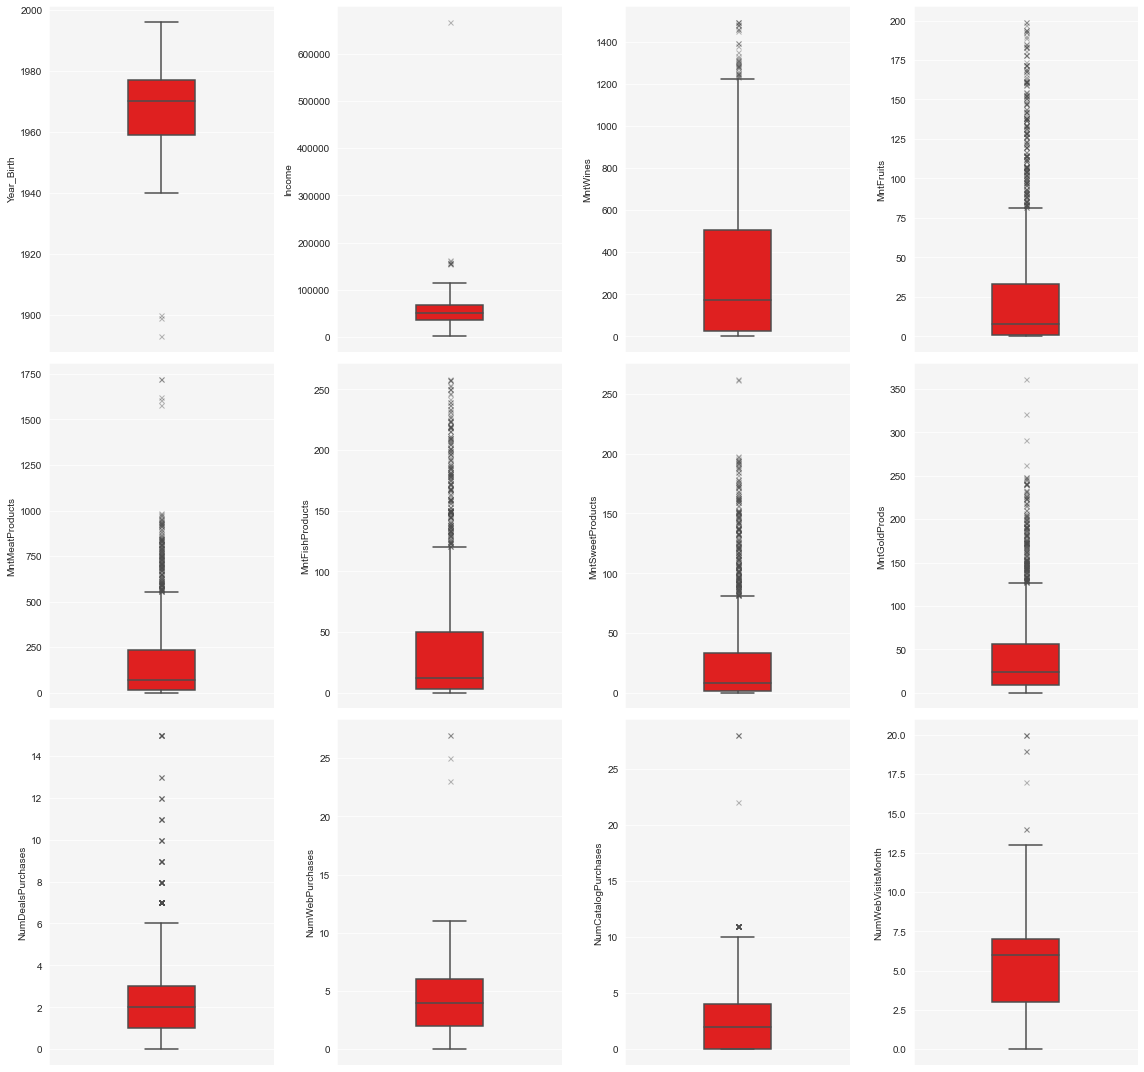

In [87]:
# Visualizing features with outliers
sns.set_style("darkgrid", rc = {'axes.facecolor':'whitesmoke', 'fliersize': 6})
plt.figure(figsize = (16, 15))

for i, with_outlier in enumerate(features_w_outliers):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = customers[with_outlier], 
                color = 'red', 
                width = .3, 
                fliersize = 4, 
                flierprops = dict(marker = 'x', markersize = 5, alpha = .4))
    plt.tight_layout()

Some values seem odd. Let's take a closer look at them:

In [24]:
# A closer look to Year_Birth variable
odd_yb = customers[customers['Year_Birth'] < 1940]
odd_yb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [25]:
# A closer look to Income variable
odd_income = customers[customers['Income'] > 200_000]
odd_income

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


Examining the features listed as containing outliers, two of them has _impossible_ values:
- `Birth_Year` has three values $\leq$ 1900;

- `Income` has one value much, much bigger than the usual income range observed in the feature. Altough it is possible that a client has a much higher earning than all others in the dataset, this specific value (MU$ 666.666,00) could very likely be a mistyping.

These four datapoints can compromise our coming analisys. Let's exclude them.

In [26]:
# Getting datapoint indexes and unpacking them into a new list
idx_to_drop = list(itertools.chain(*[odd_income.index, 
                                     odd_yb.index])) # Creating a list of idx to drop
idx_to_drop

[2233, 192, 239, 339]

In [27]:
# Dropping datapoints by index
customers.drop(idx_to_drop, inplace = True)

Now, let's review the outliers:

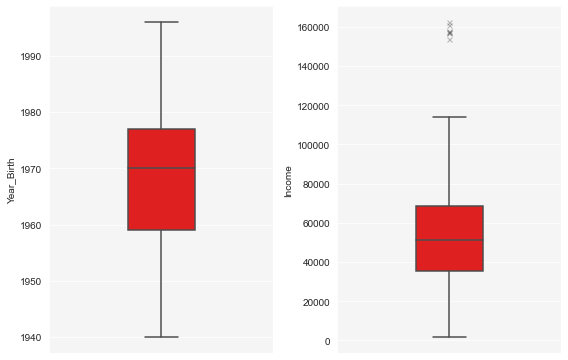

In [28]:
# Revisiting outliers after odd values removal
sns.set_style("darkgrid", rc = {'axes.facecolor':'whitesmoke', 'fliersize': 6})
plt.figure(figsize = (16, 20))
for i, with_outlier in enumerate(customers[['Year_Birth', 'Income']]):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = customers[with_outlier], 
                color = 'red', 
                width = .3, 
                fliersize = 4, 
                flierprops = dict(marker = 'x', markersize = 5, alpha = .4))
    plt.tight_layout()

Even though there are still some outliers within the `Income` variable, they no longer represent a probable wrong number.

By the time of modelling, we will handle them with the appropriate scaler.

#### ii. Categorical Outliers (or _absurd_ values)

In [29]:
categorical_features = customers.select_dtypes(include = 'object').columns.tolist()
categorical_features

['Education', 'Marital_Status', 'Dt_Customer']

From the three categorical features, two of them are really categorical. `Dt_Customer` is a datetime object which we will be working later on the Analysis of the data. Let's remove it from the categorical list for now:

In [30]:
# Removing Dt_Customer from categorical list
categorical_features.pop(2) # pop by list index

categorical_features

['Education', 'Marital_Status']

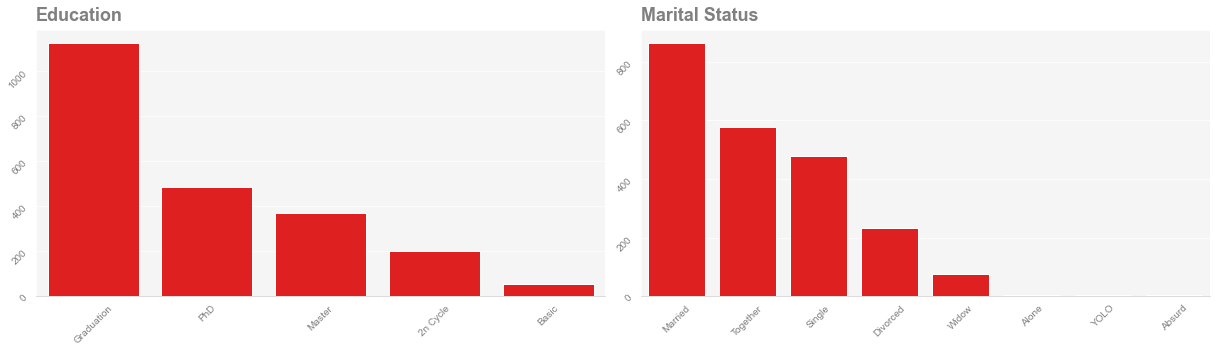

In [31]:
# Reviewing Education (graphically)
fig, ax = plt.subplots(1, 2, figsize = (17, 5))

sns.barplot(x = customers['Education'].value_counts().index, 
            y = customers['Education'].value_counts().values,
            color = 'red', ax = ax[0])
ax[0].set(ylabel = None, xlabel = None)
ax[0].set_title('Education', loc = 'left', size = 18, 
                pad = 10, fontweight = 'bold', fontname = 'Arial', color = 'gray')
ax[0].spines['bottom'].set_color('lightgray')
ax[0].xaxis.label.set_color('gray')
ax[0].tick_params(axis='both', colors='gray', rotation = 45)

sns.barplot(x = customers['Marital_Status'].value_counts().index, 
            y = customers['Marital_Status'].value_counts().values,
            color = 'red', ax = ax[1])
ax[1].set(ylabel = None, xlabel = None)
ax[1].set_title('Marital Status', loc = 'left', size = 18, 
                pad = 10, fontweight = 'bold', fontname = 'Arial', color = 'gray')
ax[1].spines['bottom'].set_color('lightgray')
ax[1].xaxis.label.set_color('gray')
ax[1].tick_params(axis='both', colors='gray', rotation = 45)

plt.tight_layout()

The `Education` variable seems realiable, with _consistent_ values. 

We can say the same about `Marital_Status`. It seems like we have 3 _weird_ categories: `Alone`, `Absurd` and `YOLO`.

Let's take a closer look at each of them and perform necessacy modifications.

**Starting with the `Alone` category:**

In [32]:
# Filtering Alone Marital_Status
customers[customers['Marital_Status'] == 'Alone']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,0


Three customers are described as _Alone_. Most likely they are single.

Let's change their category to `Single` then:

In [33]:
# Getting "alone" customers index
alone_idx = customers[customers['Marital_Status'] == 'Alone']['Marital_Status'].index

# Replacing Alone for Single
customers.loc[alone_idx, 'Marital_Status'] = 'Single' 

In [34]:
# Checking changes
customers.loc[alone_idx]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958,Master,Single,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0
138,7660,1973,PhD,Single,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,1
153,92,1988,Graduation,Single,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,0


**Moving forward to `Absurd` category:**

In [35]:
# Filtering Absurd Marital_Status
customers[customers['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0


In this category we have two _very different_ customers with `Marital_Status` as `Absurd`. Most importantly one of them responded to the marketing campaign positevely and effectiely baught the device. The other didn't.

We could use some techniques for replacing their Marital Status data, such as the replacing by the most frequent category in the variable, but we would be introducing noise to the data, speciffically because our _target_ variable `Response` is different.

We could also delete their information from our dataset, but if our dataset is unballances (and they tend to be in promotional campaigns analysis), we would be removing an important positive response. 

Ballancing _target_ variables is an important step for classification procedures, and this step will be performed in the modelling part of this analysis. Nonetheless it seems important to analyse this point right, so we can take a better decision.

Let's do so:

In [36]:
# Checking target variable ballance
customers['Response'].value_counts()

0    1902
1     334
Name: Response, dtype: int64

_Voilà_!

Unballanced target. Even though 334 positive respondents are more than enought sample to perform **_statisticly significant_** analysis, it's undeniable that dropping these two lines have different effects, because they do have different _weights_.

Let's check:

In [37]:
# Getting ratio: (customers who baught the device):(customers who did not buy) 
round(customers['Response'].value_counts()[0] / customers['Response'].value_counts()[1], 1) 

5.7

For approximately every **six** people, only **one** baught the device. 

It is clear that deleting the positive respondent is more compromising, comparatively speaking, for our analysis. But with this information, we now have more room to make decisions.

Let's drop the customer who did not respond to the marketing campaign and keep the one who did. And then, let's change the the remaining customer martital status to the most frequent _among those who responded to the campaign_:

In [38]:
customers[(customers['Marital_Status'] == 'Absurd')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0


In [39]:
#Getting absurd value indexes
absu_to_drop_index = customers[(customers['Marital_Status'] == 'Absurd') & (customers['Response'] == 0)].index
absu_to_keep_index = customers[(customers['Marital_Status'] == 'Absurd') & (customers['Response'] == 1)].index

absu_to_drop_index, absu_to_keep_index

(Int64Index([2134], dtype='int64'), Int64Index([2093], dtype='int64'))

The one to drop:

In [40]:
# Dropping datapoint with absurd value
customers.drop(index = absu_to_drop_index, inplace = True)

In [41]:
# Reviwing it
try:
    customers.loc[absu_to_drop_index]
except KeyError:
    print('Index not found. Dropping succeded!')

Index not found. Dropping succeded!


Now let's deal with the customer we want to keep:

In [42]:
# Getting most frequent value among positive respondents
customers[customers['Response'] == 1]['Marital_Status'].mode()

0    Single
dtype: object

In [43]:
# No need to import the SimpleImputer here, let's do it straighforwardly with .loc
customers.loc[customers['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'

# Checking
customers.loc[absu_to_keep_index]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Single,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1


**Finally, let's taka a look at `YOLO` category:**

In [44]:
customers[customers['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,1


Whatever **_you only live once_** means as a response to marital status, it is uninportant because both entries seems to be exactly the same (duplicated), except for `ID` and, most importantly, `Response`.

Since we aren't able to decide if this customer did or did not buy the device, best option is to drop these _confusing_ datapoints:

In [45]:
# Getting index to drop
yolo_to_drop = customers[customers['Marital_Status'] == 'YOLO'].index

# Dropping yolo_to_drop
customers.drop(customers[customers['Marital_Status'] == 'YOLO'].index, inplace = True)

# Checking dropping success
try:
    customers.loc[yolo_to_drop]
except KeyError:
    print('Indexes not found. Dropping succeded!')

Indexes not found. Dropping succeded!


So far, we have covered almost all the steps in our schedule. The only thing left is saving the cleaned dataset into a new csv file, for posterior use.

## 6. Saving cleaned dataset into a new csv file

In [47]:
# customers.to_csv('../data/customers_cleaned.csv', index = False) # Uncomment this line if you want to 
#                                                                  # save the cleaned pdf.

In [48]:
# pd.read_csv('../data/customers_cleaned.csv')